In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
data=pd.read_csv(r'C:\Users\kuba8\Desktop\studium\Python_record\video_example\coordinates\slide8.txt',delimiter='\t',header=None)
data_p=pd.read_csv(r'C:\Users\kuba8\Desktop\studium\Python_record\video_example\coordinates\slide10.txt',delimiter='\t',header=None)

In [3]:
data

,0,1,2,3
0,0.0,0.672642,0.380646,-0.047319
1,1.0,0.672879,0.328384,-0.055352
2,2.0,0.673126,0.353479,-0.036884
3,3.0,0.663965,0.288550,-0.029094
4,4.0,0.672850,0.312605,-0.055295
...,...,...,...,...
463,463.0,0.702098,0.276642,0.028010
464,464.0,0.695800,0.276359,0.021154
465,465.0,0.692088,0.274769,0.013674
466,466.0,0.751922,0.278051,0.035294


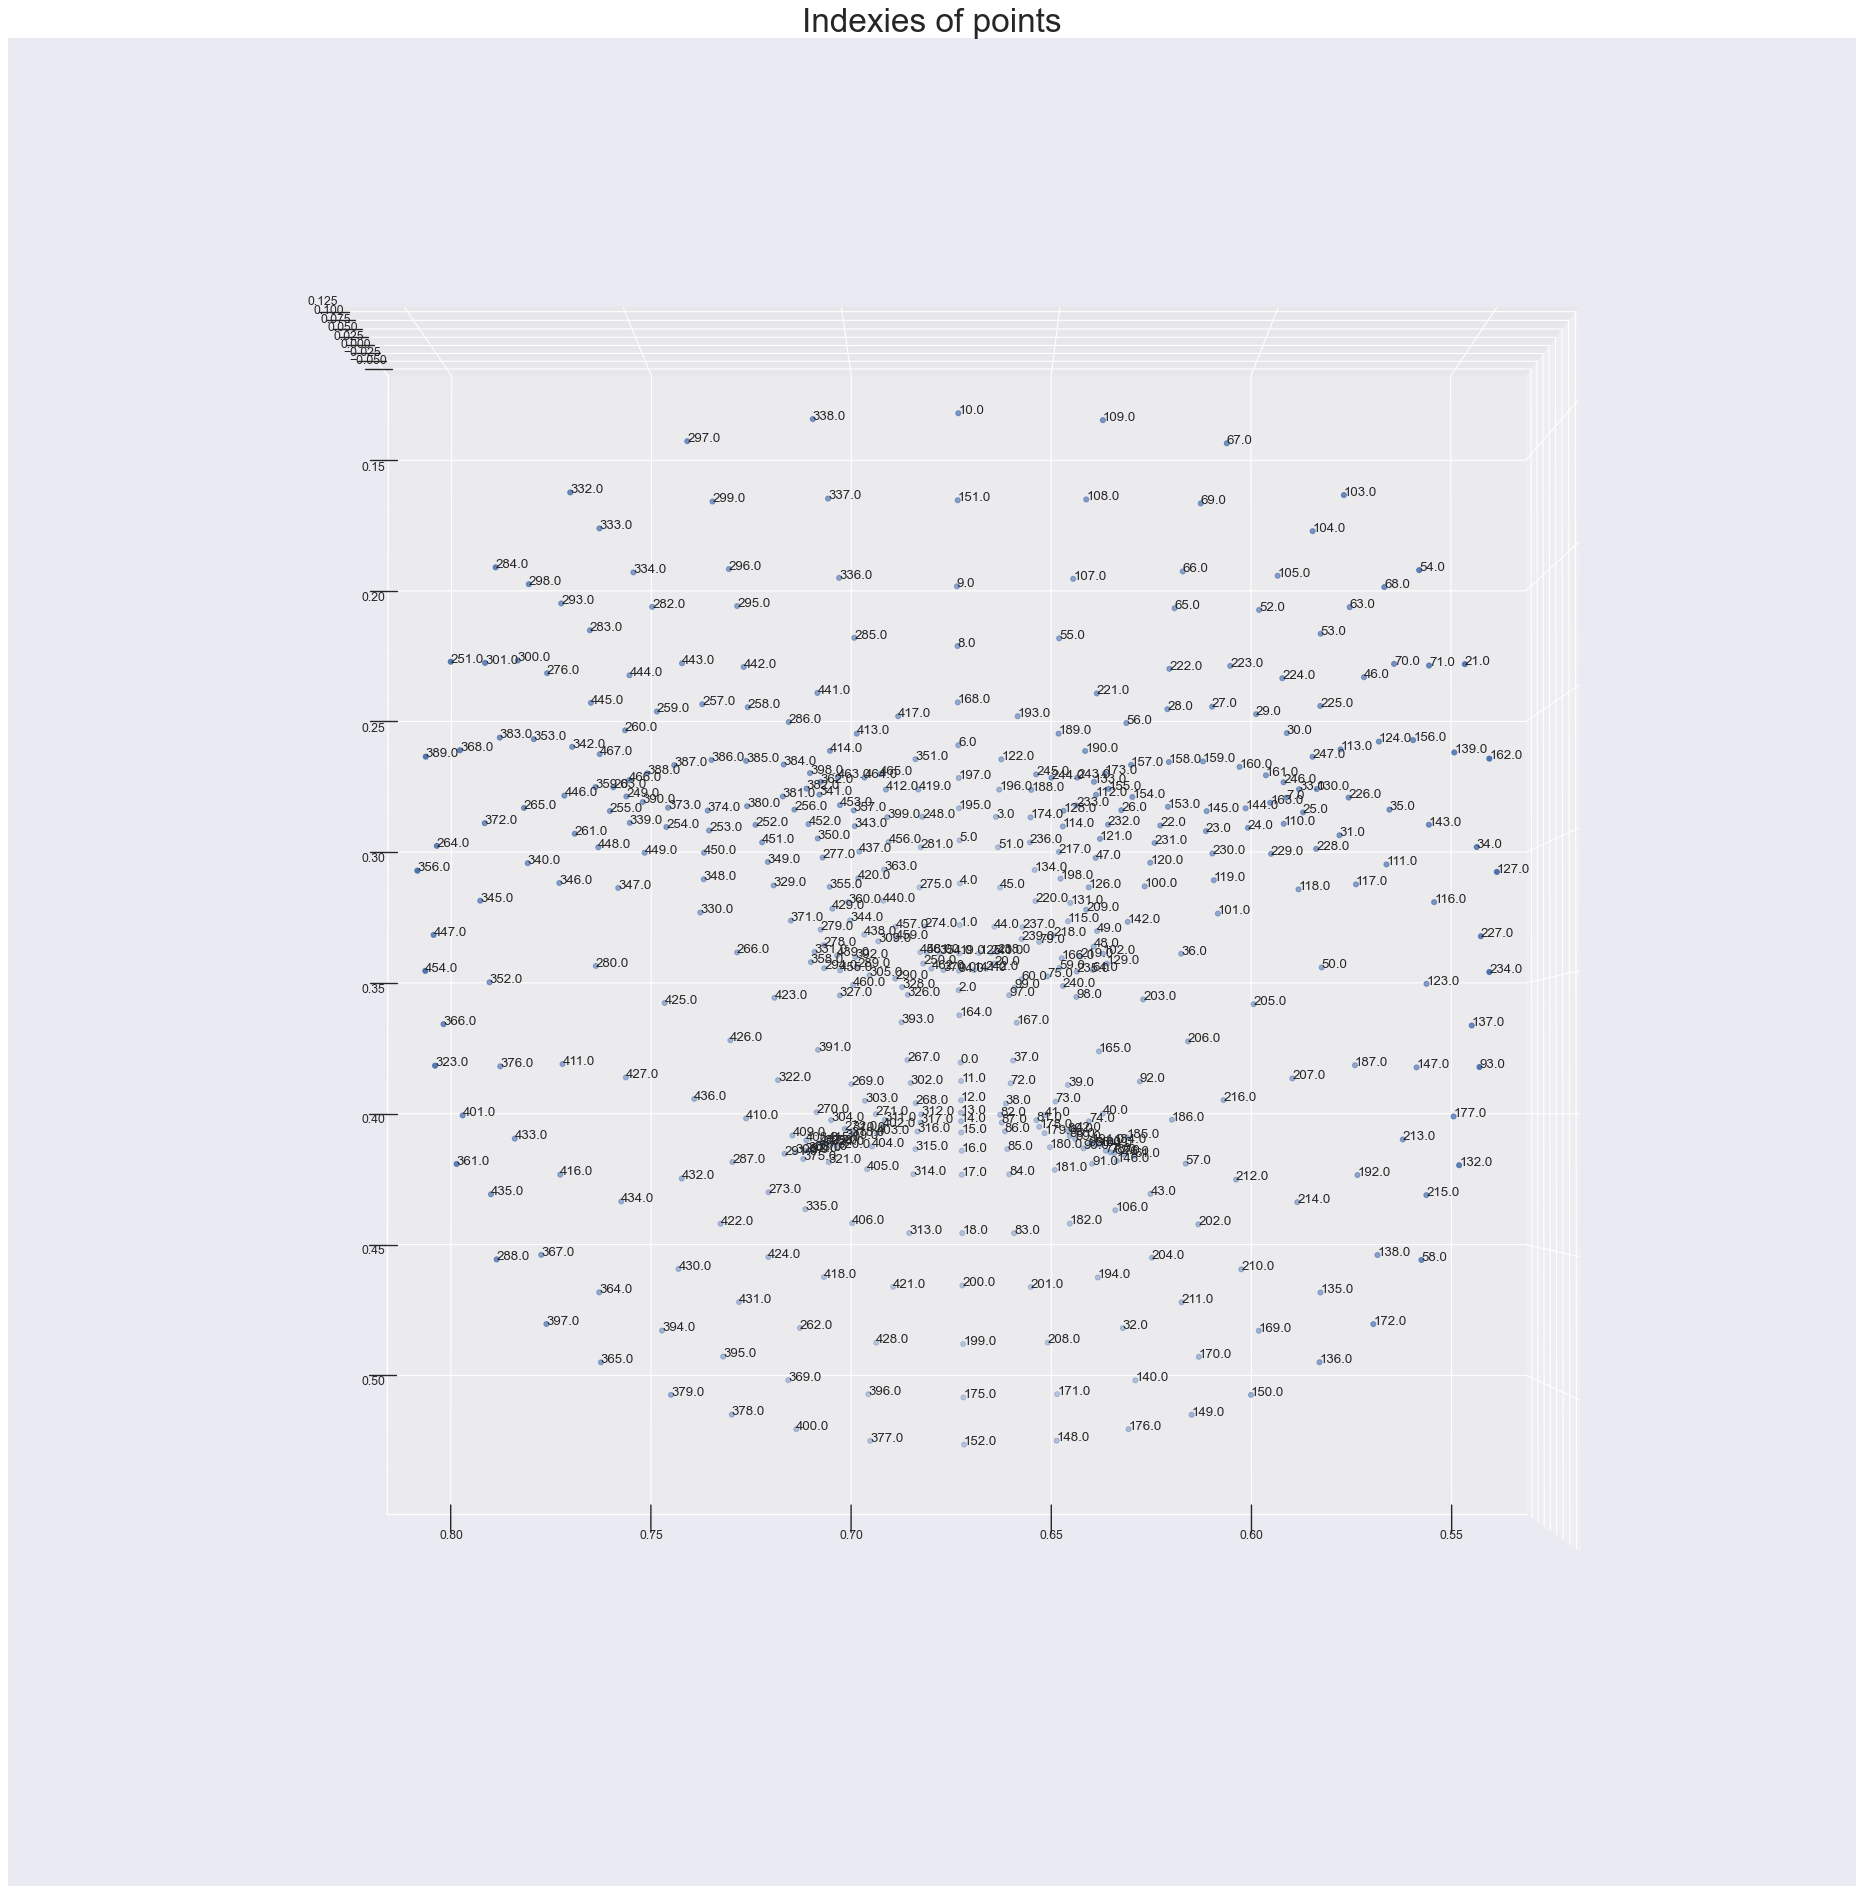

In [4]:
#plot points with their indexies
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(40, 30), dpi=80)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(data[1], data[2], data[3])

for i in range(len(data)):
    ax.text(data[1][i], data[2][i], data[3][i],str(data[0][i]))
ax.set_title('Indexies of points',size=30)
ax.view_init(89, 90)

In [5]:
#function for calculating distance between two points
def distance(a,b):
    c=sqrt((a[1]-b[1])**2+(a[2]-b[2])**2+(a[3]-b[3])**2)
    return c

In [6]:
#create matrix from distances
mat=pd.DataFrame([])
for i in range(len(data)):
    a=pd.DataFrame({'index':[i],'value':[distance(data.iloc[i][1:4],data_p.iloc[i][1:4])]})
    mat=pd.concat([mat,a])

Text(0, 0.5, 'Distance')

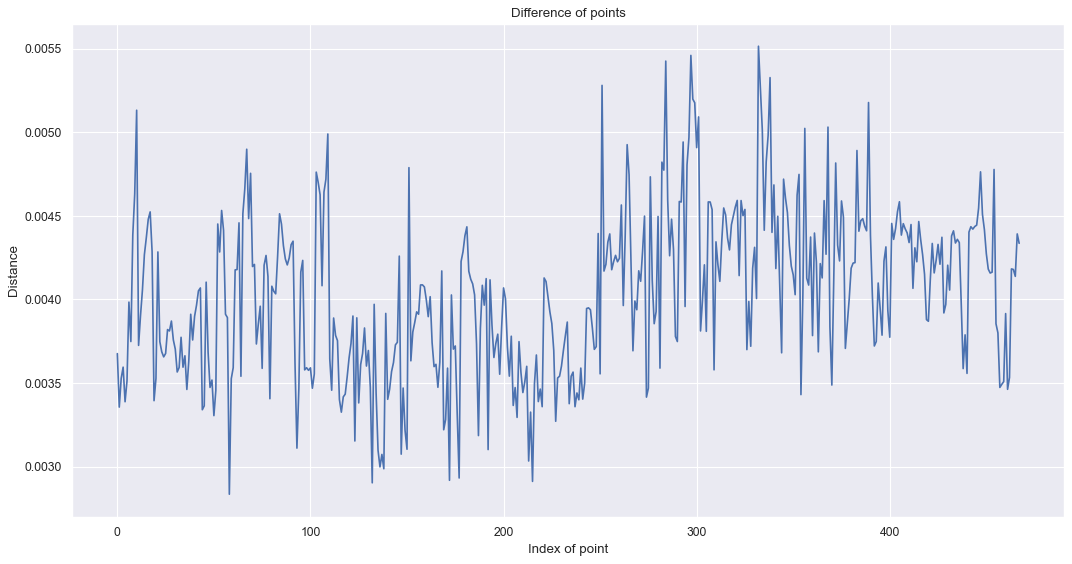

In [7]:
fig = plt.figure(figsize=(16, 8), dpi=80)
ax = fig.add_subplot()
ax.plot(mat['index'],mat['value'])
ax.set_title('Difference of points')
ax.set_xlabel('Index of point')
ax.set_ylabel('Distance')

In [8]:
mat_sorted=mat.sort_values(by=['value']).reset_index().drop('level_0',axis=1)

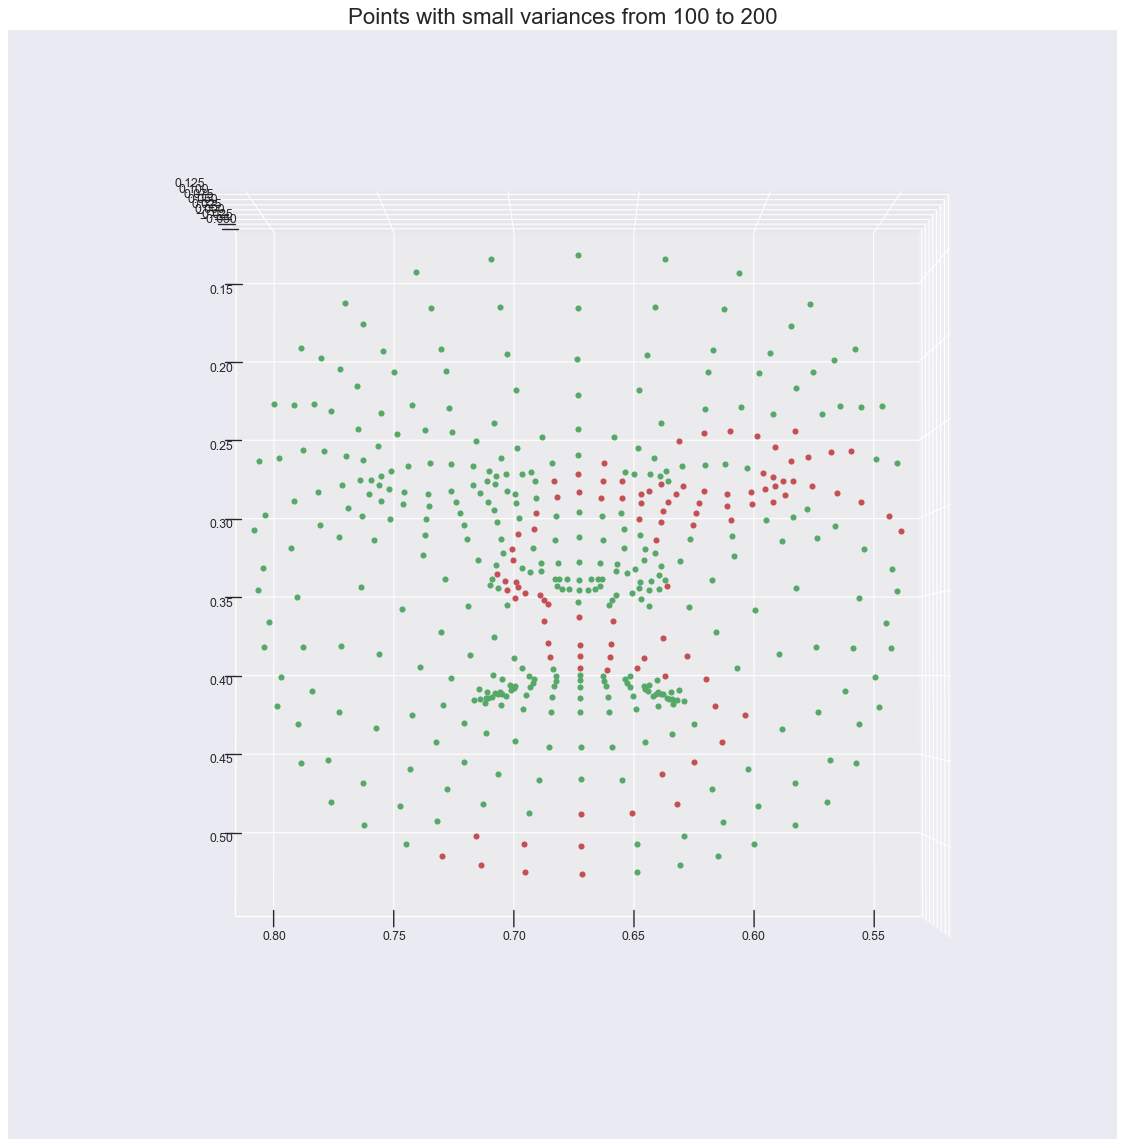

In [9]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(24, 18), dpi=80)
ax = fig.add_subplot(111, projection = '3d')

a=100
b=200

for i in range(a):
    ax.scatter(data[1][mat_sorted['index'][i]], data[2][mat_sorted['index'][i]], data[3][mat_sorted['index'][i]], color='g')

for i in range(a,b):
    ax.scatter(data[1][mat_sorted['index'][i]], data[2][mat_sorted['index'][i]], data[3][mat_sorted['index'][i]], color='r')
    
for i in range(b,len(mat_sorted)):
    ax.scatter(data[1][mat_sorted['index'][i]], data[2][mat_sorted['index'][i]], data[3][mat_sorted['index'][i]], color='g')

ax.set_title(f'Points with small variances from {a} to {b}',size=20)
ax.view_init(89, 90)

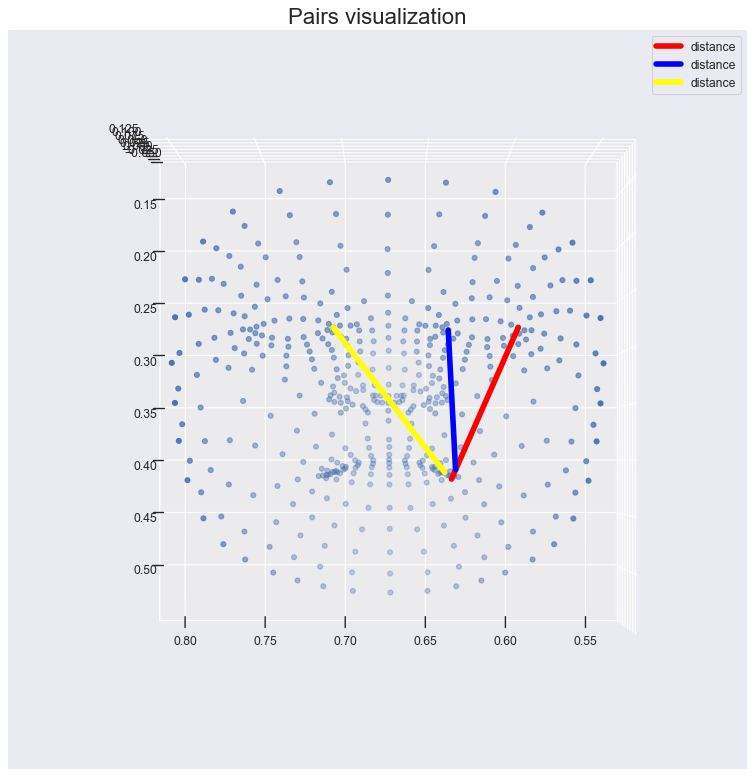

In [15]:
#ploting selected points on specific size

#choose left/right
sight='left'

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16, 12), dpi=80)
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(data[1], data[2], data[3])

def pair(a,b,col,label):
    x=[data[1][a],data[1][b]]
    y=[data[2][a],data[2][b]]
    z=[data[3][a],data[3][b]]
    ax.plot(x,y,z,color=col,linewidth=5,label=label) 

## for right side
if sight=='right':
    #first pair 1
    pair(263,308,'red','distance')

    #second pair 14
    pair(308,398,'blue','distance')

    #third pair 14
    pair(185,466,'yellow','distance')

## for left side
elif sight=='left':
    #first pair 1
    pair(146,246,'red','distance')

    #second pair 14
    pair(185,155,'blue','distance')

    #third pair 14
    pair(183,362,'yellow','distance')


ax.set_title('Pairs visualization',fontsize=20)
ax.legend()
ax.view_init(89, 90)